Date: 09.04.2023

Author: Reto Hendry

This notebook is to test the reversal of the resampled and flattened np array. It should also mark the most relevant feature. 

## import libs and define functions

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nibabel as nib

In [2]:
def plot_3d_array_colored(array, marked_indices=None):
    # Create a 3D figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a colormap
    cmap = plt.get_cmap('viridis')

    # Normalize the array values to fit the colormap range
    norm = plt.Normalize(array.min(), array.max())

    # Create a boolean mask for filled voxels
    filled = np.ones(array.shape, dtype=bool)

    # Plot the voxels using the facecolors and the boolean mask
    facecolors = cmap(norm(array))
    ax.voxels(filled, facecolors=facecolors, edgecolor='k', linewidth=0, alpha=0.6)

    # If marked_indices is provided, add separate voxels with different edge colors for marked elements
    if marked_indices is not None:
        for index in marked_indices:
            marked_filled = np.zeros(array.shape, dtype=bool)
            marked_filled[tuple(index)] = True
            ax.voxels(marked_filled, facecolors=facecolors[tuple(index)], edgecolor='r', linewidth=1, alpha=0.8)

    # Set the axis labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, shrink=0.8)

    # Show the plot
    plt.show()

In [3]:
def unpad_array(padded_array, padding):
    """
    Unpad a padded array.

    Parameters
    ----------
    padded_array : numpy.ndarray
        The padded array.
    padding : list
        A list of tuples containing the padding values for each dimension.

    Returns
    -------
    original_array : numpy.ndarray
        The original array before padding.
    
    """
    # Initialize an empty list to store the slices for each dimension
    slices = []
    
    # Loop through each dimension's padding values
    for pad in padding:
        start = pad[0]

        if pad[1] > 0:
            stop = -pad[1]
        else:
            stop = None  # slice till the end
        
        slices.append(slice(start, stop))
    
    original_array = padded_array[tuple(slices)]

    return original_array

## padding -> reverse

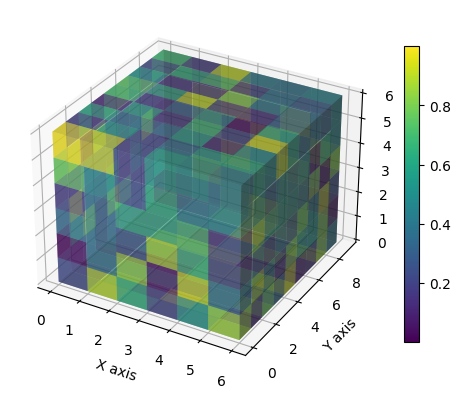

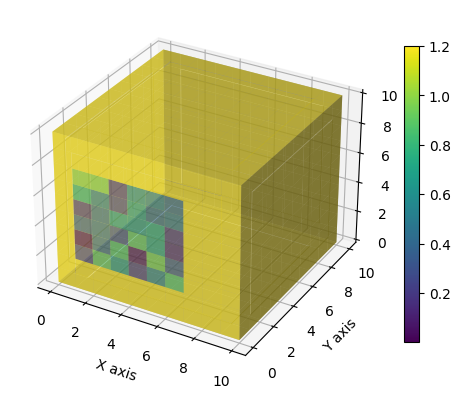

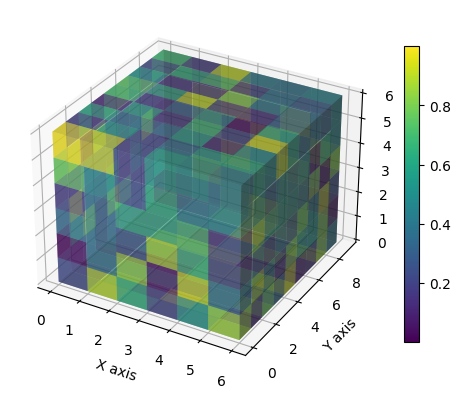

True


In [13]:
# create a padding list
padding = [(1, 3), (0, 1), (2, 2)]

# create a small 3d array of random numbers
small_3d_array = np.random.rand(6, 9, 6)
plot_3d_array_colored(small_3d_array)

# pad the array
padded_small_3d_array = np.pad(small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_small_3d_array)

# Reverse the padding operation
original_array = unpad_array(padded_small_3d_array, padding)
plot_3d_array_colored(original_array)

# Check if the arrays are equal
print(np.array_equal(small_3d_array, original_array))

## resampling -> reverse

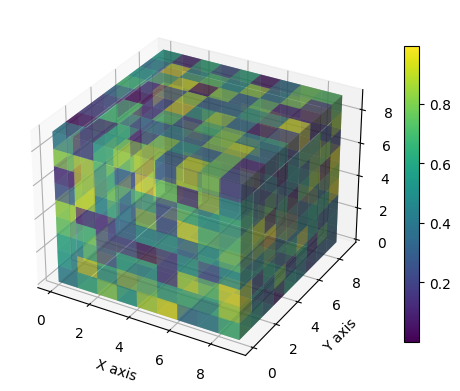

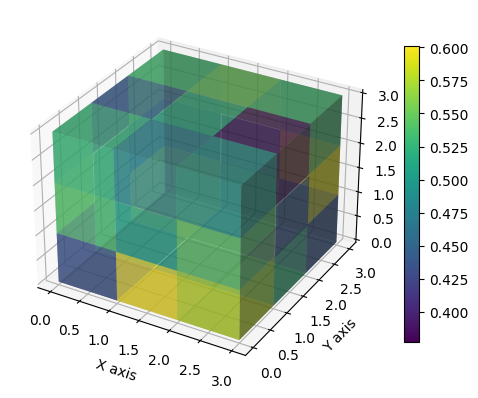

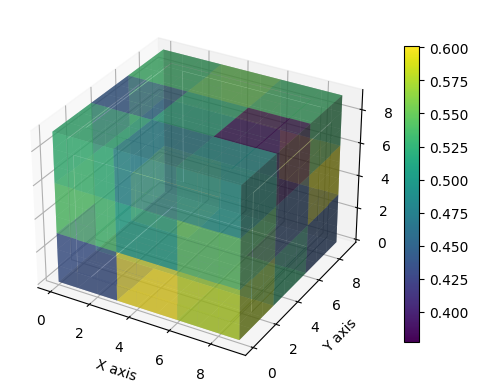

In [14]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (small_3d_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array)


## resampling, reshaping -> reverse

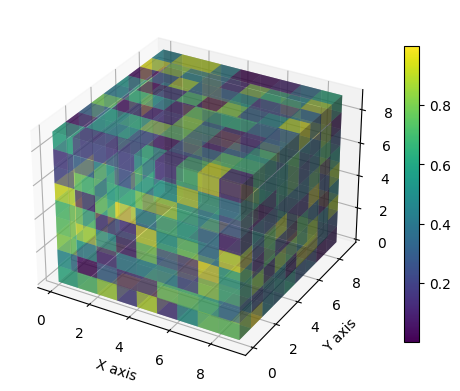

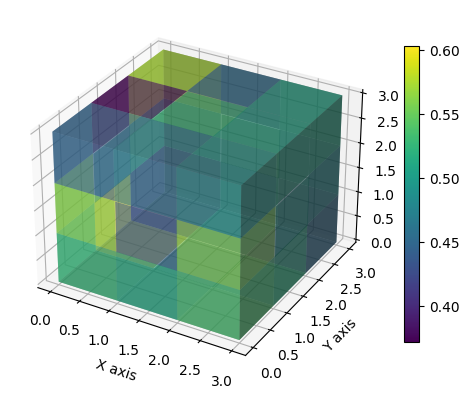

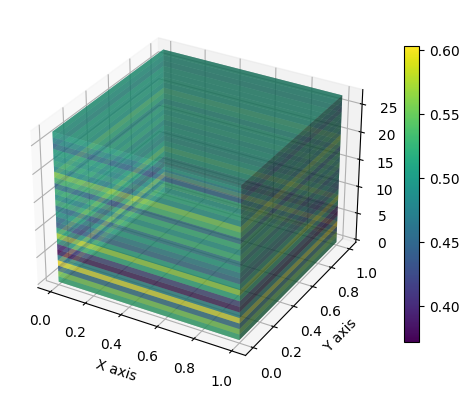

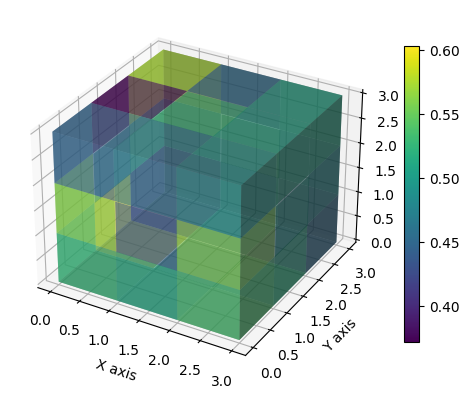

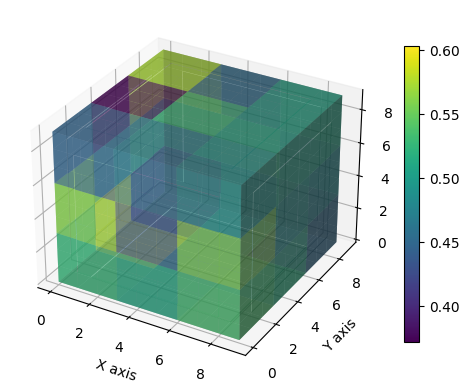

In [15]:
# create a 3d array of random numbers
# the array must be a multiple of the resample_cube since it represents the padded array
resample_cube = (3, 3, 3)
factor = 3
padded_3d_arr = np.random.rand(resample_cube[0] * factor, 
                              resample_cube[1] * factor, 
                              resample_cube[2] * factor)

# plot the array
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))

# plot the array
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))

# plot the array
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)

# plot the array
plot_3d_array_colored(unflattened_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)

# plot the array
plot_3d_array_colored(expanded_3d_array)

## padding, resampling, reshaping -> reverse

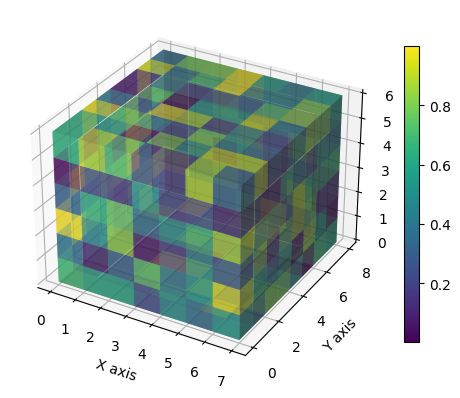

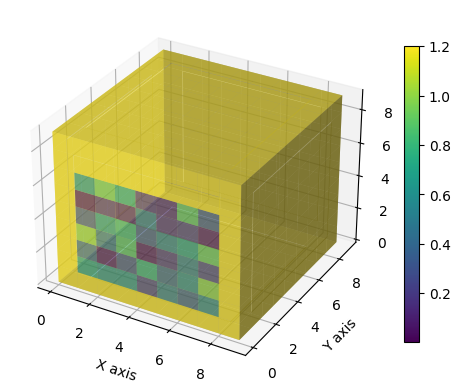

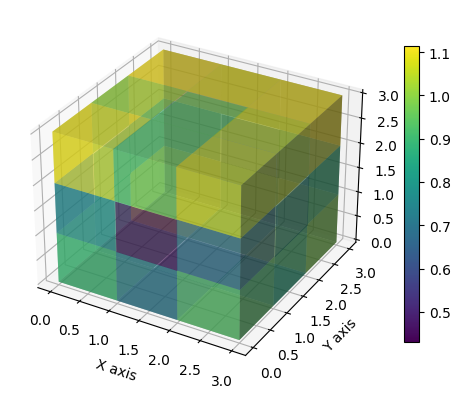

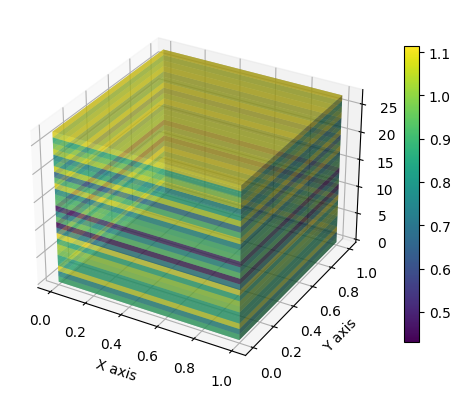

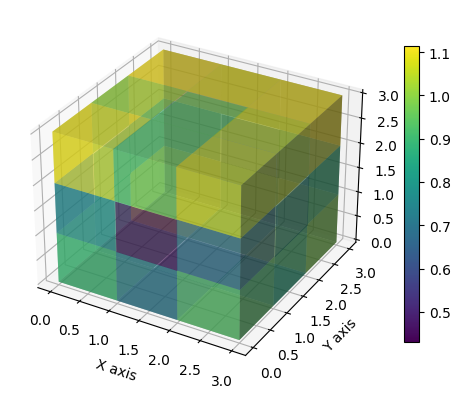

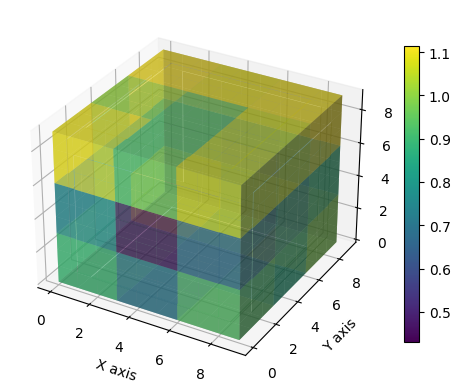

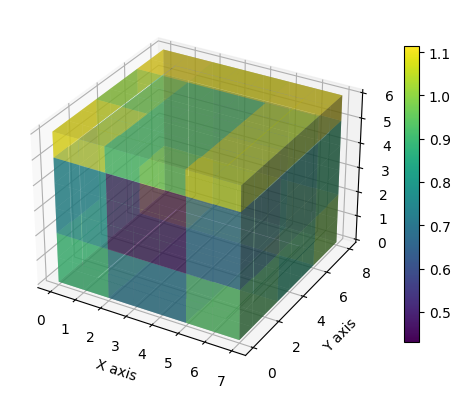

In [16]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array)

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
plot_3d_array_colored(original_array)

## + visualize features

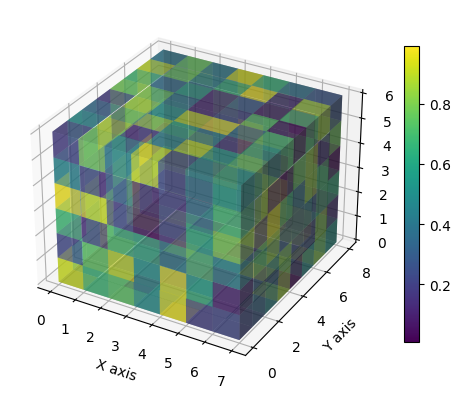

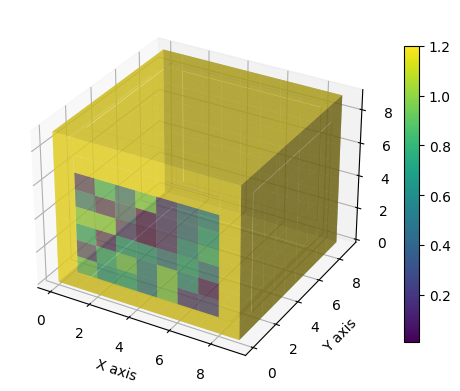

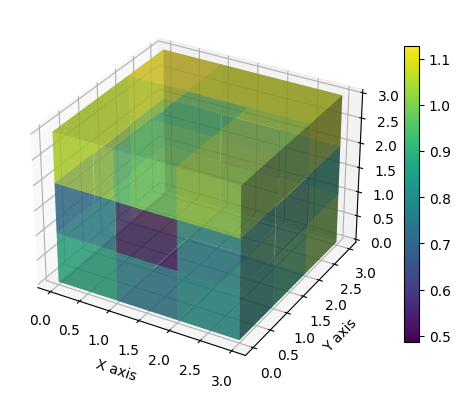

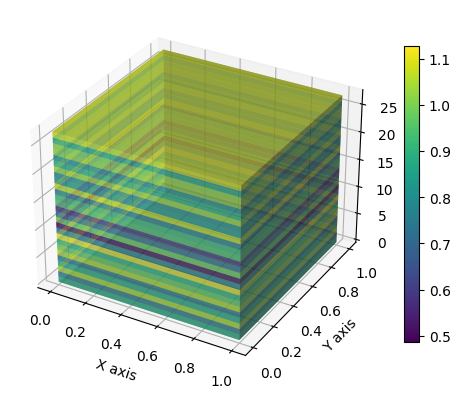

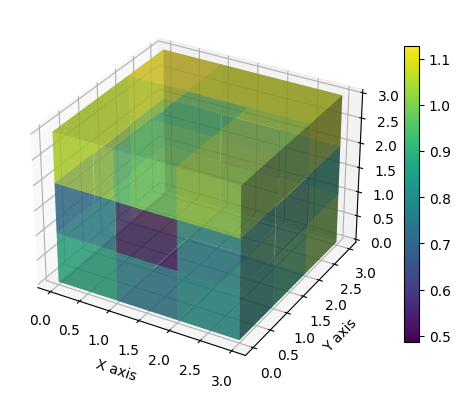

(3, 3, 3)
[(0, 0, 2), (0, 2, 2), (2, 1, 0)]
[[0 0 2]
 [0 2 2]
 [2 1 0]]


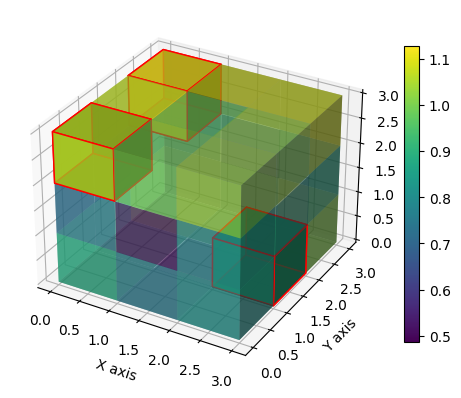

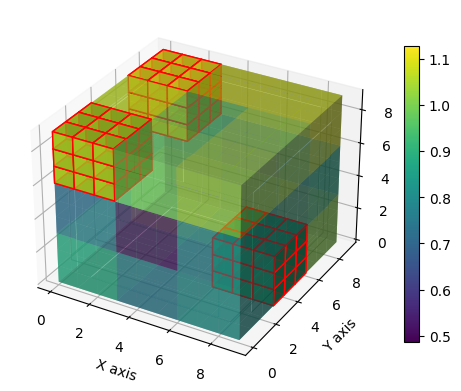

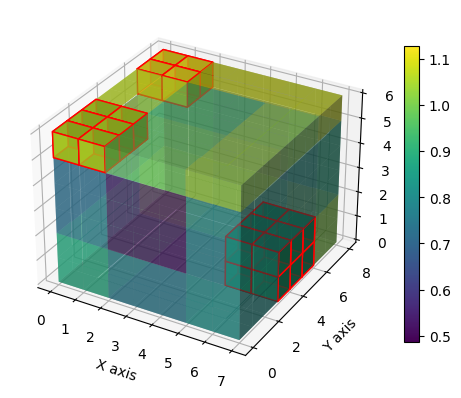

In [17]:
s = 3
resample_cube = (s, s, s)
padding = [(1, 1), (0, 1), (1, 2)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(7, 8, 6)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [2, 8, 21]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

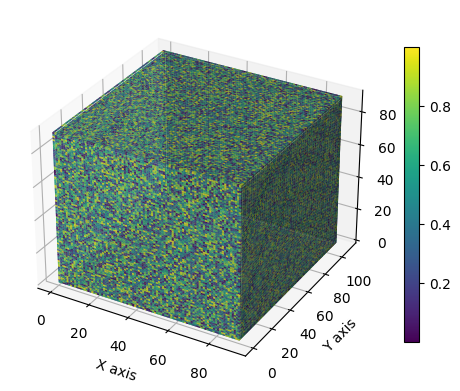

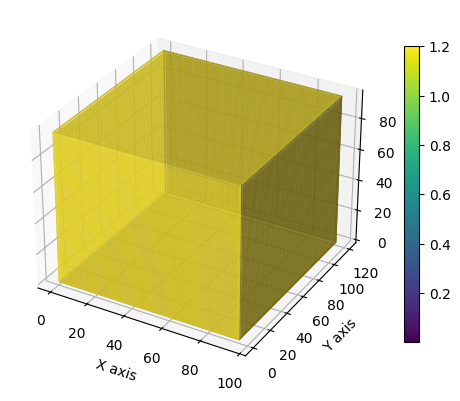

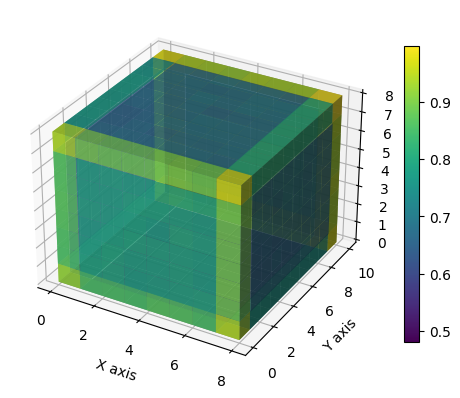

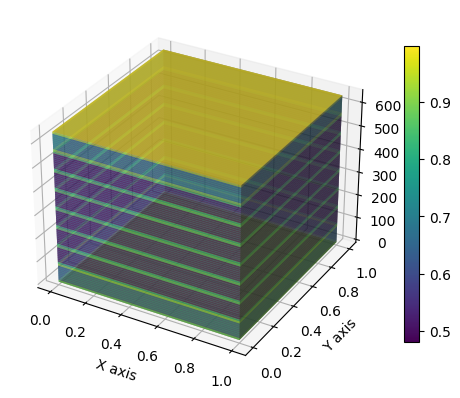

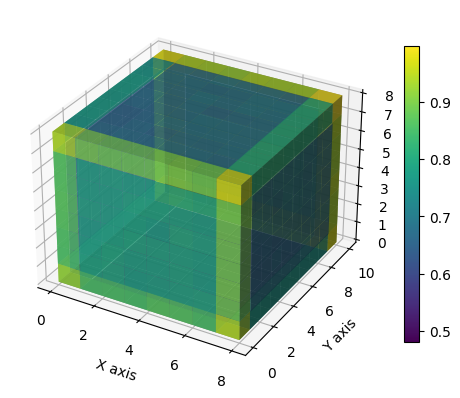

(8, 10, 8)
[(4, 5, 3), (2, 4, 4), (2, 5, 5), (4, 4, 5), (5, 4, 5), (3, 2, 3), (2, 6, 1), (3, 4, 5), (3, 4, 1), (1, 5, 4)]
[[1 5 4]
 [2 4 4]
 [2 5 5]
 [2 6 1]
 [3 2 3]
 [3 4 1]
 [3 4 5]
 [4 4 5]
 [4 5 3]
 [5 4 5]]


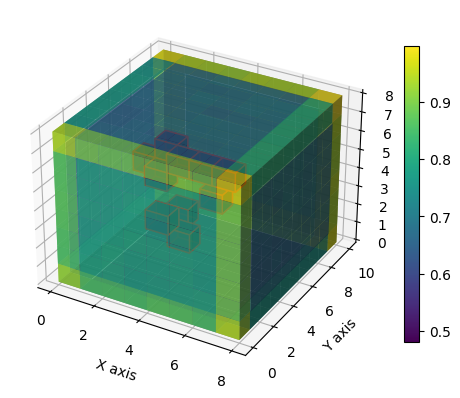

KeyboardInterrupt: 

In [14]:
# example on shape of actual MVPA data

s = 12
resample_cube = (s, s, s)
padding = [(2, 3), (5, 6), (2, 3)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(91, 109, 91)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [363, 196, 205, 357, 437, 259, 209, 277, 273, 124]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

In [ ]:
# example on shape of actual MVPA data

s = 13
resample_cube = (s, s, s)
padding = [(0, 0), (4, 4), (0, 0)]

# create a small 3d array of random numbers
first_small_3d_array = np.random.rand(91, 109, 91)
plot_3d_array_colored(first_small_3d_array)

######################
# pad the array
padded_3d_arr = np.pad(first_small_3d_array, padding, mode="constant", constant_values=1.2)
plot_3d_array_colored(padded_3d_arr)

######################
# resample the array (code from function_resample_4d_array.py)
small_3d_array_size = tuple(int(padded_3d_arr.shape[i] / resample_cube[i]) for i in range(3))

strides = tuple(
    padded_3d_arr.strides[k] * resample_cube[k] for k in range(3)
) + padded_3d_arr.strides
window_view = np.lib.stride_tricks.as_strided(
    padded_3d_arr, shape=small_3d_array_size + resample_cube, strides=strides
)

small_3d_array = np.mean(window_view, axis=(-3, -2, -1))
plot_3d_array_colored(small_3d_array)

######################
# reshape the array (flatten)
flattened_array = small_3d_array.reshape((1, 1, -1))
plot_3d_array_colored(flattened_array)

######################
# reverse the reshape (unflatten)
unflattened_array = flattened_array.reshape(small_3d_array_size)
plot_3d_array_colored(unflattened_array)

######################
# Find the indices of the important elements in the unflattened array 
# based on the flattened array
marker_array = unflattened_array.copy()
important_indices_flattened = [94, 95, 347, 158, 222, 284, 346, 276, 288, 155]
important_indices_3d = [np.unravel_index(index, unflattened_array.shape) for index in important_indices_flattened]
print(unflattened_array.shape)
print(important_indices_3d)
for indx in important_indices_3d:
    marker_array[indx] = True
indices = np.argwhere(marker_array == True)
print(indices)
plot_3d_array_colored(unflattened_array, marked_indices=indices)

######################
# reverse the resampling operation

# Expand the smaller array back to the original shape
expanded_3d_array = (unflattened_array
                     .repeat(resample_cube[0], axis=0)
                     .repeat(resample_cube[1], axis=1)
                     .repeat(resample_cube[2], axis=2)
)
expanded_marker_array = (marker_array
                        .repeat(resample_cube[0], axis=0)
                        .repeat(resample_cube[1], axis=1)
                        .repeat(resample_cube[2], axis=2)
)
plot_3d_array_colored(expanded_3d_array, np.argwhere(expanded_marker_array == True))

######################
# Reverse the padding operation
original_array = unpad_array(expanded_3d_array, padding)
original_marker_array = unpad_array(expanded_marker_array, padding)
plot_3d_array_colored(original_array, np.argwhere(original_marker_array == True))

## create and test the function

initial state:
- image of the brain is given, since every brain is normalized, I can take any of the sample to display where the regions of interests are.
- the indices of the flatt array are given
- the padding is given
- resample_cube is given
- shape of resampled array is given

final state:
- array with the 3d indices 

In [4]:
def get_feature_positions(top_features, padding, resample_cube, shape_resampled_array):

    def unpad_array(padded_array, padding):
        """
        Unpad a padded array.

        Parameters
        ----------
        padded_array : numpy.ndarray
            The padded array.
        padding : list
            A list of tuples containing the padding values for each dimension.

        Returns
        -------
        original_array : numpy.ndarray
            The original array before padding.
        
        """
        # Initialize an empty list to store the slices for each dimension
        slices = []
        
        # Loop through each dimension's padding values
        for pad in padding:
            start = pad[0]

            if pad[1] > 0:
                stop = -pad[1]
            else:
                stop = None  # slice till the end
            
            slices.append(slice(start, stop))
        
        original_array = padded_array[tuple(slices)]

        return original_array

    # create an array of np.nans with the shape of the resampled array
    marker_array = np.full(shape_resampled_array, np.nan)

    # Find the indices of the important elements in the unflattened array 
    # based on the flattened array
    top_indices_3d = [np.unravel_index(index, marker_array.shape) for index in top_features]
    for indx in top_indices_3d:
        marker_array[indx] = True

    # expand marker _array to the original shape
    expanded_marker_array = (marker_array
                            .repeat(resample_cube, axis=0)
                            .repeat(resample_cube, axis=1)
                            .repeat(resample_cube, axis=2)
    )

    # Reverse the padding operation
    original_marker_array = unpad_array(expanded_marker_array, padding)

    # Find the indices of the important elements in the 3d array
    marker = np.argwhere(original_marker_array == True)

    print("done with get_feature_positions")

    return marker

done with get_feature_positions


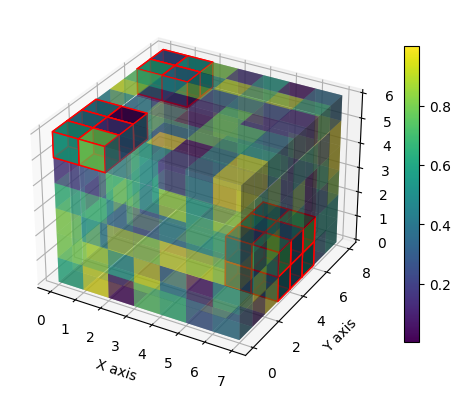

In [8]:
marker = get_feature_positions(
    [2, 8, 21], 
    [(1, 1), (0, 1), (1, 2)],
    3,
    (3, 3, 3)
)

array = np.random.rand(7, 8, 6)
plot_3d_array_colored(array, marker)

In [9]:
marker = get_feature_positions(
    [363, 196, 205, 357, 437, 259, 209, 277, 273, 124], 
    [(2, 3), (5, 6), (2, 3)],
    12,
    (8, 10, 8)
)

array = np.zeros((91, 109, 91))
# plot_3d_array_colored(array, marker)

done with get_feature_positions


In [7]:
# Create a 3D array filled with zeros (black) of shape (91, 109, 91)
black_image = np.zeros((91, 109, 91), dtype=np.uint8)

# create the marker array
marker = get_feature_positions(
    [54705, 57190, 57235, 57236, 57189, 54706, 59811, 59765, 54659, 54660, 59766, 44261, 44260, 57464, 59719, 41731, 67862, 44307, 57281, 44306, 41730, 45875, 50012, 51475, 49229, 59812, 91871, 54934, 50152, 46836, 49275, 57144, 43345, 51896, 59857, 71966, 52543, 19238, 59720, 46835, 62616, 44215, 51805, 46790, 40815, 59301, 54980, 41605, 49365, 54335, 52542, 51850, 39073, 49045, 51759, 39028, 41651, 51575, 72089, 64219, 41776, 56864, 57556, 65331, 46881, 49183, 54334, 41604, 32023, 51849, 74621, 46515, 72091, 57418, 91825, 52221, 48405, 47400, 54751, 57327, 67816, 49230, 62342, 44601, 39200, 42145, 52129, 42146, 41777, 44871, 56865, 46837, 34552, 57465, 57510, 51804, 82260, 61695, 72090, 54289, 56771, 39661, 74575, 19239, 64172, 69559, 61689, 67178, 46791, 34600, 43346, 48945, 44305, 62110, 95333, 61688, 82259, 31489, 71907, 37226, 39201, 57096, 59119, 61830, 39662, 59673, 49320, 59300, 60132, 62341, 77151, 72043, 50892, 31535, 61690, 45876, 64468, 55026, 49276, 44916, 42099, 66983, 21814, 50013, 59858, 41775, 56818, 61642, 71965, 71967], 
    [(0, 1), (0, 1), (0, 1)],
    2,
    (46, 55, 46)
)

# Set the indices in the marker array to white (maximum value for the data type)
for idx in marker:
    black_image[tuple(idx)] = 255

affine_matrix = np.array([
    [-2.,  0.,  0., 90.],
    [ 0.,  2.,  0., -126.],
    [ 0.,  0.,  2., -72.],
    [ 0.,  0.,  0., 1.]
])

# Create a NIfTI image object from the modified image array and affine matrix
modified_image = nib.Nifti1Image(black_image, affine_matrix)

# Save the NIfTI image to a file
nib.save(modified_image, "mask_test_RC2_F150.nii")

done with get_feature_positions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# create a 4d array which represents (sample, x, y, z)
# the shape should be (2, 6, 4, 2) so it is basically two samples with a volume of 6x4x2
# the values should increase by 1 starting from 0
sample_array_4d = np.arange(0, 48, 1, dtype=int).reshape(2, 6, 4, 2)

# do a 3d plot of the first sample, the color should be the value of the element in the array


Original array and reshaped array are equal: True


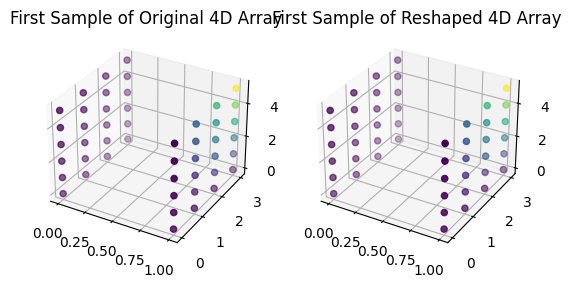

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Check if the original array and the reshaped array are equal
print("Original array and reshaped array are equal:", np.array_equal(array, array_reversed))

# Plot the first sample of the original 4D array
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
x, y, z = np.meshgrid(np.arange(array.shape[1]), np.arange(array.shape[2]), np.arange(array.shape[3]), indexing='ij')
ax.scatter(x, y, z, c=array[0].flatten(), marker='o', cmap='viridis')
ax.set_title("First Sample of Original 4D Array")

# Plot the first sample of the reshaped 4D array
ax2 = fig.add_subplot(122, projection='3d')
x2, y2, z2 = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')
ax2.scatter(x2, y2, z2, c=array_reversed[0].flatten(), marker='o', cmap='viridis')
ax2.set_title("First Sample of Reshaped 4D Array")

plt.show()


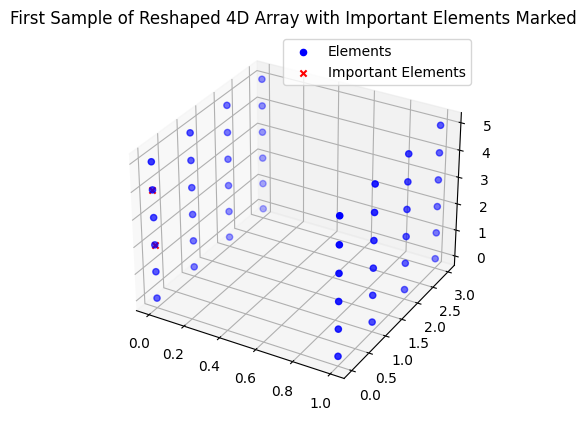

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Flatten the 4D array into a 2D array
def flatten_array(array):
    return array.reshape(array.shape[0], -1)

# Reshape the 2D array back to the original 4D shape
def reshape_to_original(array_2d, original_shape):
    return array_2d.reshape(original_shape)

# Create a 4D array (2 samples, each of shape 6x4x2)
array = np.array([[[[i * j * k for i in range(6)] for j in range(4)] for k in range(2)] for _ in range(2)])

# Flatten the 4D array into a 2D array
original_shape = array.shape
array_2d = flatten_array(array)

# Reshape the 2D array back to the original 4D shape
array_reversed = reshape_to_original(array_2d, original_shape)

# Find the indices of the important elements (3rd and 5th) in the flattened array
important_indices_flattened = [2, 4]
important_indices_4d = [np.unravel_index(index, array_reversed[0].shape) for index in important_indices_flattened]

# Plot the first sample of the reshaped 4D array, marking the important elements with an 'X'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = np.meshgrid(np.arange(array_reversed.shape[1]), np.arange(array_reversed.shape[2]), np.arange(array_reversed.shape[3]), indexing='ij')

# Plot all elements in blue
ax.scatter(x, y, z, c='b', marker='o', label='Elements')

# Plot important elements in red
for index in important_indices_4d:
    ax.scatter(index[0], index[1], index[2], c='r', marker='x', label='Important Elements')

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='best')

ax.set_title("First Sample of Reshaped 4D Array with Important Elements Marked")

plt.show()
